In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
from simulation_statistics.analysis_functions_definitions import *
import os

c:\winpython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\brian2-2.0.2.1-py2.7-win-amd64.egg\brian2\core\variables.py:170: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)


In [3]:
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 11})
mlib.rcParams.update({'figure.autolayout': True})

In [4]:
# fname = "runtime_analysis_drifting_grating_134215_03092018" # first test on XPS
# fname = "runtime_analysis_drifting_grating_140931_03092018" # first test on SANDS
# fname = "runtime_analysis_drifting_grating_144155_03092018" # constant_delay from name as well
# fname = "runtime_analysis_drifting_grating_145839_03092018" # constant_delay from name as well SANDS
# fname = "runtime_analysis_drifting_grating_125045_18092018" # SANDS w/ diff shared seed
fname = "runtime_analysis_drifting_grating_150440_05102018" # Sands after diff shared seed + some sensitivity analysis

root_stats = "C:\\Work\phd\\simulation_statistics\\runtime_analysis_meta"

# root_syn = "D:\Work\Neurogenesis-PhD\synaptogenesis\\"
root_syn = "C:\\Work\\phd\\synaptogenesis"

suffix_test = ""
# suffix_test = "_2_angles"
# suffix_test = "_4_angles"
# suffix_test = "_all_angles"
# suffix_test = "_45_degrees"
# suffix_test = "_64x64"

filename_absolute = os.path.join(root_stats, fname + ".npz")
print filename_absolute
data = np.load(filename_absolute)

C:\Work\phd\simulation_statistics\runtime_analysis_meta\runtime_analysis_drifting_grating_150440_05102018.npz


In [5]:
testing_random_delay_files = data['testing_random_delay_files']
testing_constant_delay_files = data['testing_constant_delay_files']
training_random_delay_files = data['training_random_delay_files']
training_constant_delay_files = data['training_constant_delay_files']
exception_files = data['exceptions']
keyerror_count = data['keyerror_count']
ioerror_count = data['ioerror_count']
exception_strings = data['exception_strings']

print "keyerror_count", keyerror_count
print "ioerror_count", ioerror_count
print "testing_random", testing_random_delay_files.size
print "testing_constant", testing_constant_delay_files.size
print "training_random", training_random_delay_files.size
print "training_constant", training_constant_delay_files.size
print "exceptions", exception_files.size
print exception_files

keyerror_count 100
ioerror_count 10
testing_random 410
testing_constant 110
training_random 1470
training_constant 130
exceptions 112
[['error_random_delay_smax_128_gmax_1_384k_sigma_7.5_3_all_angles_3.npz'
  array('Iterated through all neighbours of tracking node but did not find a preceding node! Consider increasing acceptable discrepancy between sought traceback cost and actual cost at node. Terminating...',
      dtype='|S196')]
 ['error_random_delay_smax_128_gmax_1_192k_sigma_7.5_3_angle_45_64x64.npz'
  array(IOError(28, 'No space left on device'), dtype=object)]
 ['error_random_delay_smax_64_gmax_2_192k_sigma_7.5_3_angle_0.npz'
  array('\n     Received exception class: SpinnmanTimeoutException \n     With message: Operation SCPCommand.CMD_SIG timed out after 1.0 seconds \n     When sending to 255:255:0\n     Stack trace: []\n',
      dtype='|S187')]
 ['error_random_delay_smax_128_gmax_2_368k_sigma_7.5_3_angle_NESW_diff_shared_seeds_fbase_0.5_pelimpot_0.npz'
  array('Operation wai

In [6]:
training_random_times_per_simtime = {}
for trd in training_random_delay_files:
    if trd[1] in training_random_times_per_simtime.keys():
        training_random_times_per_simtime[trd[1]].append(trd[2])
    else:
        training_random_times_per_simtime[trd[1]] = [trd[2]]
        
for trd in training_constant_delay_files:
    if trd[1] in training_random_times_per_simtime.keys():
        training_random_times_per_simtime[trd[1]].append(trd[2])
    else:
        training_random_times_per_simtime[trd[1]] = [trd[2]]
training_simtimes = np.sort(np.asarray(training_random_times_per_simtime.keys()))
average_training = []
sem_training = []
for k in training_simtimes:
    average_training.append(np.mean(training_random_times_per_simtime[k]))
    sem_training.append(scipy.stats.sem(training_random_times_per_simtime[k]))
average_training = np.asarray(average_training)
sem_training = np.asarray(sem_training)

WARNING    c:\winpython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
 [py.warnings]
  keepdims=keepdims)

WARNING    c:\winpython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]
  ret = ret.dtype.type(ret / rcount)



In [7]:
print "Average time scaling:", np.mean((average_training*ms) / (training_simtimes*ms))

Average time scaling: 3.2211358584277434


WARNING    c:\winpython-64bit-2.7.9.4\python-2.7.9.amd64\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
 [py.warnings]
  warnings.warn("This figure includes Axes that are not "



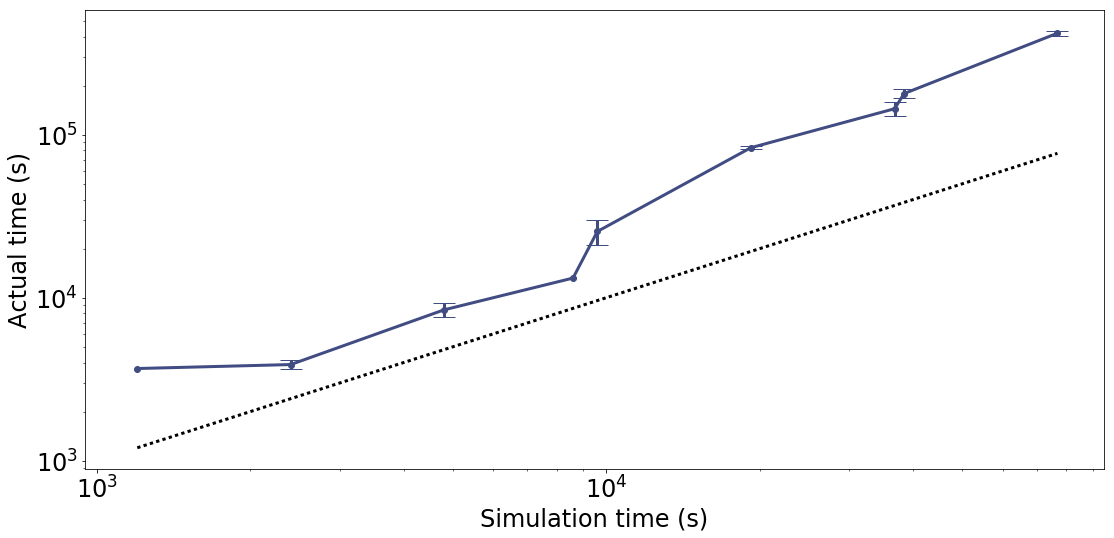

In [8]:
fig = plt.figure(figsize=(16, 8), dpi=600)
plt.errorbar(training_simtimes*ms, average_training*ms, yerr=sem_training*ms,
        color='#414C82', lw=3)

plt.scatter(training_simtimes*ms, average_training*ms, 
        color='#414C82')
plt.plot(training_simtimes*ms, training_simtimes*ms, color='k', lw=3, ls=':')
plt.xlabel("Simulation time (s)")
plt.ylabel("Actual time (s)")

plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')

plt.savefig("training_actual_runtime{}.pdf".format(suffix_test), bbox_inches='tight')
plt.show()

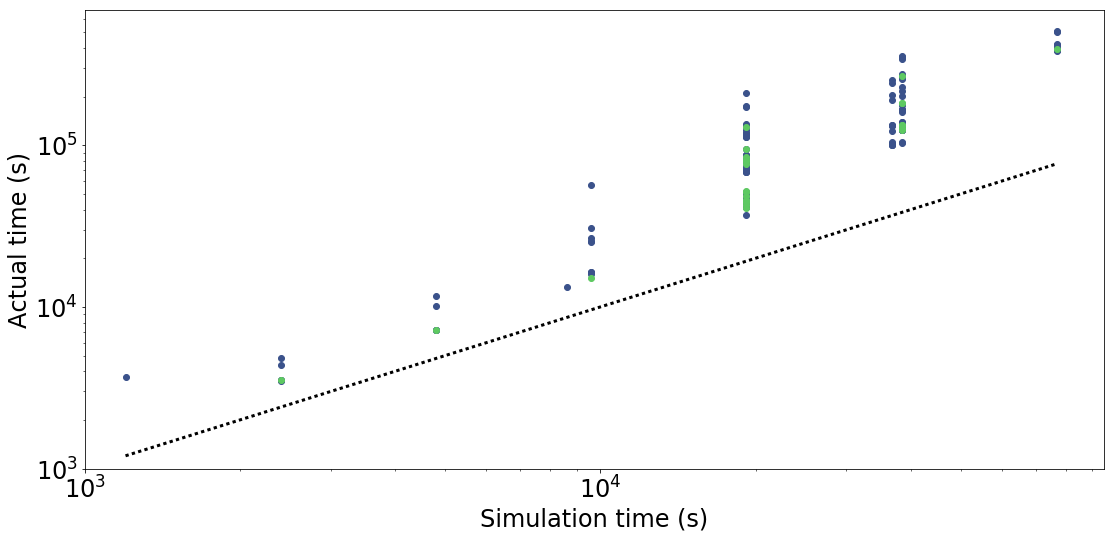

In [9]:
fig = plt.figure(figsize=(16, 8), dpi=600)
viridis_cmap = mlib.cm.get_cmap('viridis')
# for tst_rand in testing_random_delay_files:
#     plt.scatter(tst_rand[1]*ms, tst_rand[2]*ms, 
#             color=viridis_cmap(0))
# for tst_const in testing_constant_delay_files:
#     plt.scatter(tst_const[1]*ms, tst_const[2]*ms, 
#             color=viridis_cmap(.25))

for tr_rand in training_random_delay_files:
    plt.scatter(tr_rand[1]*ms, tr_rand[2]*ms, 
            color=viridis_cmap(.25))
for tr_const in training_constant_delay_files:
    plt.scatter(tr_const[1]*ms, tr_const[2]*ms, 
            color=viridis_cmap(.75))
    
plt.plot(training_simtimes*ms, training_simtimes*ms, color='k', lw=3, ls=':')
plt.xlabel("Simulation time (s)")
plt.ylabel("Actual time (s)")

plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')

plt.ylim(ymin=10**3)
plt.xlim(xmin=10**3)

plt.savefig("all_actual_runtimes{}.pdf".format(suffix_test), bbox_inches='tight')
plt.show()